# Mineral Deposits Investigation

A commercially interesting application of all of this data and technology is to find valuable mineral deposits. We might be able to predict where new deposits will be discovered!

## A global mineral resources dataset

The USGS maintains a **Mineral Resources Data System (MRDS)** on its [website](http://mrdata.usgs.gov/mrds/). RDS is a collection of reports describing metallic and nonmetallic mineral resources throughout the world. Included are deposit name, location, commodity, deposit description, geologic characteristics, production, reserves, resources, and references.

We've included part of the database in this tutorial. Let's load it.

In [1]:
import csv

# Open the MRDS data file.
filename = 'Data/MRDS.csv'

# Create empty lists for the latitudes, longitudes and commodity.
lats, lons, commodity = [], [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[7]))
        lons.append(float(row[6]))
        commodity.append(row[5])

We have three lists: one with latitudes, one with longitudes, and one with the commodity type. You can browse through the data manually with the following code snippet. Change the ```ITEM_NUMBER``` parameter to see a different item of the list.

In [2]:
# Show item number 15. You can change '15' to see different data items.
ITEM_NUMBER = 15

print("There are %s items in the list" % len(lats))
print("Item number %s is at %s %s and contains '%s'" % (ITEM_NUMBER, lats[ITEM_NUMBER], lons[ITEM_NUMBER], commodity[ITEM_NUMBER]))

There are 304466 items in the list
Item number 15 is at 63.32633 -145.69301 and contains ' CU PB AU '


Item 15 contains copper (CU), lead (PB) and gold (AU).

We can also see which commodities are available.

In [3]:
commodities = []

for l in [com.split() for com in commodity]:
    commodities.extend(l)
    
print(set(commodities))

{'STN_C', 'GRF', 'NA', 'CO', 'PB_S', 'FE_P', 'W', 'CLY', 'OIL_SA', 'PGE_RU', 'PUM', 'NA_S', 'BA', 'ASH', 'MG', 'ABR', 'DIT', 'COA', 'COA_L', 'PB_R', 'MG_C', 'PGE_RH', 'PGE_PD', 'HF', 'TRA', 'TL', 'CLY_BC', 'ABR_C', 'CU_O', 'S', 'STN_D_S', 'V', 'DOL', 'SUL', 'CO2', 'REE_CE', 'SN', 'PER', 'LST_D', 'P', 'I', 'VOL', 'NI_S', 'COA_A', 'MIC', 'H2O', 'GA', 'NA_H', 'HG', 'LST', 'FLD', 'MPG', 'SLA', 'ZR', 'ZEO', 'TA_S', 'CLY_BK', 'AG_R', 'TE', 'LI', 'F', 'N', 'GEM_E', 'CLY_C', 'NA_SS', 'TI', 'COA_S', 'AND', 'PGE_IR', 'CR_F', 'PGE', 'CLY_BM', 'S_A', 'WOL', 'TH', 'MN_F', 'GEM', 'GEM_R', 'B', 'TI_R', 'CD', 'SE', 'ZN', 'CLY_BN', 'TLC', 'PYR', 'STN_C_S', 'SDG', 'CA', 'OIL_SH', 'GE', 'TI_M', 'GYP_A', 'TI_HM', 'CU', 'AG', 'LST_C', 'GRT', 'SIL', 'NA_SC', 'ASB', 'CL', 'W_C', 'U', 'FE', 'STN_D', 'ABR_E', 'HE', 'CEM', 'SC', 'SR', 'PGE_PT', 'RB', 'CLY_K', 'K', 'STA', 'CLY_FR', 'AL_C', 'PPY', 'REE_Y', 'CLY_M', 'SIL_F', 'CS', 'GEM_J', 'ZN_R', 'RA', 'PGE_OS', 'AU', 'OLV', 'GEO', 'BI', 'GEM_D', 'W_R', 'GEM_SA',

It'd be much nicer to see this all plotted on a map.

In [4]:
# Setup code. Don't worry too much about this.
%matplotlib inline
import matplotlib.pyplot as plt
import pygplates
import sys
sys.path.append('../libs/')
from tut import Tutorial
tutorial = Tutorial()

Reconstructing coastlines...
Plotting coastlines...


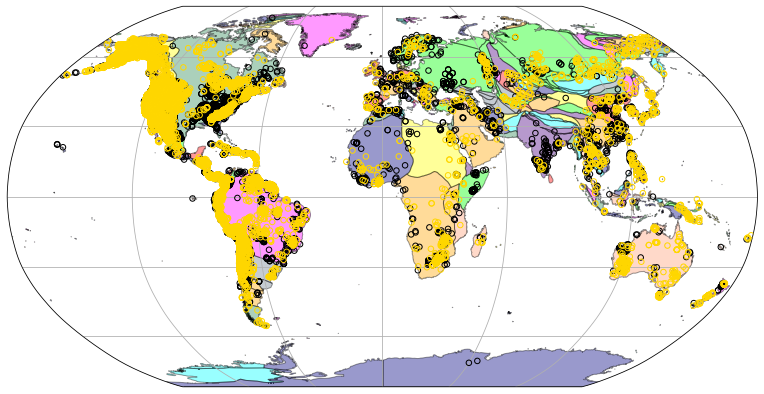

In [5]:
# Set the reconstruction time - 0 is present day (0Ma)
tutorial.reconstruction_time = 0

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    #'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    'mineral',
    #'velocities'
]

tutorial.plot_layers(layers, ax)
plt.show()

You can also change the ```reconstruction_time``` above if you want to see how the mineral deposits were positioned in the past.

# Questions

1. What features can tell us where valuable mineral deposits are likely to be found?
2. Do our models of plate tectonic movement suggest how mineral deposits might have originated and thus where they might be found in the future?
3. (Challenge) Where in the world is Minecraft set?